# AAI 551 Final Project: Tic-Tac-Toe Reinforcement Learning

**Students:** Jinwen Wu, Samantha Ramcharran

**Date:** December 2025

---

## Problem: Compare 5 RL Algorithms on Tic-Tac-Toe

1. Q-Learning (Tabular)
2. SARSA (Tabular)
3. DQN (Neural Network)
4. REINFORCE (Policy Gradient)
5. MCTS (Search-based)

In [1]:
# Setup - Use Python version 3.13 or 3.12 for code to work
import os, numpy as np, matplotlib.pyplot as plt, pandas as pd
from agents import *
from utils.environment import *
from config import Config
print('✅ Imported!')

✅ Imported!


/opt/anaconda3/envs/AAI551/lib/python3.10/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
# Load trained models
agents = {
    'Q-Learning': QLearningAgent(),
    'SARSA': SARSAAgent(),
    'DQN': DQNAgent(**Config.DQN_CONFIG),
    'REINFORCE': REINFORCEAgent(**Config.REINFORCE_CONFIG),
    'MCTS': MCTSAgent(**Config.MCTS_CONFIG)
}
agents['Q-Learning'].load('models/q_learning_qtable.pkl')
agents['SARSA'].load('models/sarsa_qtable.pkl')
agents['DQN'].load('models/dqn_model.pth')
agents['REINFORCE'].load('models/reinforce_model.pth')
for n,a in agents.items(): print(f'{n}: {a}')

Q-Learning agent loaded from models/q_learning_qtable.pkl
Loaded 2420 states
SARSA agent loaded from models/sarsa_qtable.pkl
Loaded 4508 states
DQN agent loaded from models/dqn_model.pth
REINFORCE agent loaded from models/reinforce_model.pth
Q-Learning: Q-Learning Agent
  Learning Rate: 0.2
  Gamma: 0.99
  Epsilon: 0.0100
  Episodes Trained: 200000
SARSA: SARSA Agent
  Learning Rate: 0.2
  Gamma: 0.99
  Epsilon: 0.0100
  Episodes Trained: 100000
DQN: DQN Agent
  Learning Rate: 0.001
  Gamma: 0.99
  Epsilon: 0.0500
  Episodes Trained: 100000
REINFORCE: REINFORCE Agent
  Learning Rate: 0.001
  Gamma: 0.99
  Epsilon: 0.1000
  Episodes Trained: 20000
MCTS: MCTS Agent
  Learning Rate: 0.001
  Gamma: 1.0
  Epsilon: 0.0000
  Episodes Trained: 0


In [3]:
# Evaluate the outcomes
from tqdm.notebook import tqdm
def eval_agent(agent, n_games=1000):
    env, opp = TicTacToeEnv(), RandomAgent()
    agent.epsilon, w = 0.0, 0
    for _ in tqdm(range(n_games)):
        r,_,_ = play_episode(env, agent, opp, False)
        if r>0: w+=1
    return w/n_games

results = {n: eval_agent(a) for n,a in agents.items()}
for n,wr in results.items(): print(f'{n}: {wr*100:.1f}%')

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Q-Learning: 80.9%
SARSA: 80.5%
DQN: 42.9%
REINFORCE: 93.6%
MCTS: 55.1%


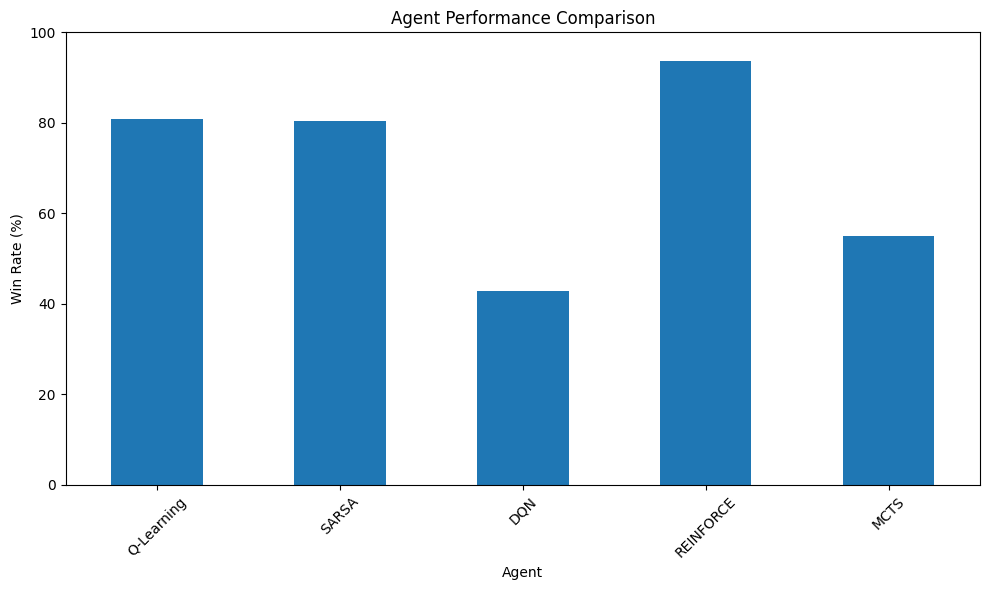

In [4]:
# Visualize using plot
df = pd.DataFrame(list(results.items()), columns=['Agent','Win Rate'])
df['Win Rate'] *= 100
df.plot(x='Agent', y='Win Rate', kind='bar', figsize=(10,6), legend=False)
plt.ylabel('Win Rate (%)')
plt.title('Agent Performance Comparison')
plt.ylim(0,100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Demo TicTacToe to show results of the game
best = max(results, key=results.get)
print(f'Best: {best} ({results[best]*100:.1f}%)')
agents[best].epsilon = 0
env = TicTacToeEnv()
r,_,info = play_episode(env, agents[best], RandomAgent(), True)
print(f'Winner: {info["winner"]}')

Best: REINFORCE (93.6%)

Starting new episode

  0 1 2
0 . . . 
1 . . . 
2 . . . 


Step 1: player_1 (REINFORCE)
Valid actions: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Selected action: 7

  0 1 2
0 . . . 
1 . . . 
2 . O . 


Step 2: player_2 (Random)
Valid actions: [0, 1, 2, 3, 4, 5, 6, 8]
Selected action: 3

  0 1 2
0 . . . 
1 O . . 
2 . X . 


Step 3: player_1 (REINFORCE)
Valid actions: [0, 1, 2, 4, 5, 6, 8]
Selected action: 1

  0 1 2
0 . O . 
1 X . . 
2 . O . 


Step 4: player_2 (Random)
Valid actions: [0, 2, 4, 5, 6, 8]
Selected action: 6

  0 1 2
0 . X . 
1 O . . 
2 O X . 


Step 5: player_1 (REINFORCE)
Valid actions: [0, 2, 4, 5, 8]
Selected action: 4

  0 1 2
0 . O . 
1 X O . 
2 X O . 


Episode finished after 5 steps
Agent 1 (REINFORCE) reward: 1
Agent 2 (Random) reward: -1

Winner: player_1
